In [1]:
!pip install scikit-plot

In [2]:
!pip install dask-ml

In [3]:
!pip install imbalanced-learn

In [4]:
!pip install fastparquet

In [5]:
!pip install pyod

In [6]:
!pip install tensorflow

In [1]:
import time
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import sys 
#Sklearn
from sklearn.metrics import *
import scikitplot as skplt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
#Imbalanced learn
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN
from imblearn.pipeline import Pipeline, make_pipeline
#Dask et Parquet
import dask.dataframe as dd 
import fastparquet
from dask_ml.preprocessing import DummyEncoder
import pickle
import dask_ml 
from dask import delayed
from dask_ml.preprocessing import StandardScaler
# Importation de l'algorithme AutoEncoder du module pyOD
from pyod.models.auto_encoder import AutoEncoder

In [2]:
os.chdir('C:\\Users\\cornuch\\Desktop\\SISE\\Fouille_donnees_massives\\projet_fouille')

# 1. Importation des fichiers et préparation

## 1.1 Importation

In [3]:
df_train=dd.read_parquet('train_fast')
df_train.head()

,FlagImpaye,Montant,VerifianceCPT1,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr3,CA3TR,Heure_num
0,0,20.00,0,551,0.000000,0.000000,0.000000,52.076034,0,1,4.0,0.00,7
1,0,20.00,0,551,0.000000,0.000000,0.000000,52.076034,1,2,4.0,8.61,7
2,0,57.64,0,549,0.000000,0.000000,0.000000,52.076034,0,1,4.0,0.00,7
3,0,54.29,1,267,0.000000,0.000000,0.000000,53.554234,0,1,4.0,0.00,7
4,0,26.90,0,549,0.003769,8.586333,0.001192,52.076034,1,1,4.0,32.25,8


In [4]:
df_test=dd.read_parquet('test_fast')
df_test.head()

,FlagImpaye,Montant,VerifianceCPT1,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr3,CA3TR,Heure_num
3899362,0,60.00,0,302,0.000000,0.000000,0.000000,52.076034,0,1,4.000000,0.00,7
3899363,0,25.00,0,547,0.000000,0.000000,0.000000,52.076034,0,1,4.000000,0.00,8
3899364,0,32.00,0,152,0.000000,0.000000,0.000000,52.076034,0,1,4.000000,0.00,8
3899365,0,20.88,0,393,0.007590,0.182221,0.002092,34.118277,4,1,1.539155,71.51,8
3899366,0,20.21,0,152,0.018994,-1.024399,0.005682,52.076034,0,1,4.000000,0.00,8


In [5]:
# Définir la variable cible 
y_train = df_train["FlagImpaye"]
y_test = df_test["FlagImpaye"]

In [6]:
# Définir les variables explicatives 
X_train = df_train.drop(["FlagImpaye"], axis = "columns")
X_test = df_test.drop(["FlagImpaye"], axis = "columns")

**Importation des fichiers équilibrés avec BorderlineSMOTE**

In [7]:
df_train_borderS=dd.read_parquet('train_borderS')
# Définir la variable cible 
y_train_border = df_train_borderS["FlagImpaye"]
# Définir les variables explicatives 
X_train_border = df_train_borderS.drop(["FlagImpaye"], axis = "columns")
X_train_border.head()

,Montant,VerifianceCPT1,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr3,CA3TR,Heure_num
0,20.00,0,551,0.000000,0.000000,0.000000,52.076034,0,1,4.0,0.00,7
1,20.00,0,551,0.000000,0.000000,0.000000,52.076034,1,2,4.0,8.61,7
2,57.64,0,549,0.000000,0.000000,0.000000,52.076034,0,1,4.0,0.00,7
3,54.29,1,267,0.000000,0.000000,0.000000,53.554234,0,1,4.0,0.00,7
4,26.90,0,549,0.003769,8.586333,0.001192,52.076034,1,1,4.0,32.25,8


In [8]:
df_train_ada=dd.read_parquet('train_ADA')
# Définir la variable cible 
y_train_ada = df_train_ada["FlagImpaye"]
# Définir les variables explicatives 
X_train_ada = df_train_ada.drop(["FlagImpaye"], axis = "columns")
X_train_ada.head()

,Montant,VerifianceCPT1,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr3,CA3TR,Heure_num
0,20.00,0,551,0.000000,0.000000,0.000000,52.076034,0,1,4.0,0.00,7
1,20.00,0,551,0.000000,0.000000,0.000000,52.076034,1,2,4.0,8.61,7
2,57.64,0,549,0.000000,0.000000,0.000000,52.076034,0,1,4.0,0.00,7
3,54.29,1,267,0.000000,0.000000,0.000000,53.554234,0,1,4.0,0.00,7
4,26.90,0,549,0.003769,8.586333,0.001192,52.076034,1,1,4.0,32.25,8


## 1.2 Centrage et réduction

In [9]:
# Instanciation de StandardScaler pour centrer-réduire les données
scaler = StandardScaler()

In [10]:
# Centrer-réduire les dataframe d'apprentissage
X_train_scale = scaler.fit_transform(X_train)
X_train_scale.head()

,Montant,VerifianceCPT1,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr3,CA3TR,Heure_num
0,-0.420302,-0.581824,1.017656,-0.084590,-0.239505,-0.275801,0.818043,-0.043817,-0.194165,-0.451325,-0.202861,-2.122399
1,-0.420302,-0.581824,1.017656,-0.084590,-0.239505,-0.275801,0.818043,-0.043812,4.975724,-0.451325,0.038808,-2.122399
2,-0.022127,-0.581824,1.008573,-0.084590,-0.239505,-0.275801,0.818043,-0.043817,-0.194165,-0.451325,-0.202861,-2.122399
3,-0.057565,1.545332,-0.272152,-0.084590,-0.239505,-0.275801,0.906727,-0.043817,-0.194165,-0.451325,-0.202861,-2.122399
4,-0.347310,-0.581824,1.008573,-0.084434,0.637044,-0.273204,0.818043,-0.043812,-0.194165,-0.451325,0.702346,-1.820898


In [11]:
# Centrer-réduire les dataframe de test
X_test_scale = scaler.fit_transform(X_test)
X_test_scale.head()

,Montant,VerifianceCPT1,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr3,CA3TR,Heure_num
3899362,-0.016999,0.0,0.265719,-0.080269,-0.043960,-0.317899,0.774799,-0.036921,-0.18432,-0.568544,-0.132257,-2.235916
3899363,-0.277531,0.0,1.427785,-0.080269,-0.043960,-0.317899,0.774799,-0.036921,-0.18432,-0.568544,-0.132257,-1.929154
3899364,-0.225425,0.0,-0.445750,-0.080269,-0.043960,-0.317899,0.774799,-0.036921,-0.18432,-0.568544,-0.132257,-1.929154
3899365,-0.308200,0.0,0.697344,-0.080074,-0.023966,-0.314458,-0.277090,-0.036897,-0.18432,-5.906429,1.259186,-1.929154
3899366,-0.313187,0.0,-0.445750,-0.079781,-0.156360,-0.308551,0.774799,-0.036921,-0.18432,-0.568544,-0.132257,-1.929154


In [12]:
X_train_border_scale = scaler.fit_transform(X_train_border)
X_train_border_scale.head()

,Montant,VerifianceCPT1,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr3,CA3TR,Heure_num
0,-0.515961,-0.647657,1.295485,-0.124668,0.112202,-0.264384,0.628654,-0.049253,-0.196192,-0.435922,-0.204627,-2.301345
1,-0.515961,-0.647657,1.295485,-0.124668,0.112202,-0.264384,0.628654,-0.049248,4.558503,-0.435922,-0.110379,-2.301345
2,-0.175906,-0.647657,1.286605,-0.124668,0.112202,-0.264384,0.628654,-0.049253,-0.196192,-0.435922,-0.204627,-2.301345
3,-0.206172,1.124615,0.034585,-0.124668,0.112202,-0.264384,0.717859,-0.049253,-0.196192,-0.435922,-0.204627,-2.301345
4,-0.453624,-0.647657,1.286605,-0.124593,0.904495,-0.263172,0.628654,-0.049248,-0.196192,-0.435922,0.148391,-1.984147


In [13]:
X_train_ada_scale = scaler.fit_transform(X_train_ada)
X_train_ada_scale.head()

,Montant,VerifianceCPT1,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr3,CA3TR,Heure_num
0,-0.523172,-0.631261,1.256956,-0.113913,0.080205,-0.265926,0.639664,-0.045952,-0.181309,-0.453426,-0.200586,-2.305235
1,-0.523172,-0.631261,1.256956,-0.113913,0.080205,-0.265926,0.639664,-0.045947,5.111903,-0.453426,-0.080160,-2.305235
2,-0.158515,-0.631261,1.248056,-0.113913,0.080205,-0.265926,0.639664,-0.045952,-0.181309,-0.453426,-0.200586,-2.305235
3,-0.190970,1.231665,-0.006955,-0.113913,0.080205,-0.265926,0.729507,-0.045952,-0.181309,-0.453426,-0.200586,-2.305235
4,-0.456325,-0.631261,1.248056,-0.113830,0.891926,-0.264560,0.639664,-0.045947,-0.181309,-0.453426,0.250487,-1.986605


# 2. Mesures de performances

**Maximisation de la marge**

In [14]:
def perte(Montant):
    if Montant<=20:
        Montant=Montant*0
    elif 20<Montant<=50:
        Montant=0.2*Montant
    elif 50<Montant<=100:
        Montant=0.3*Montant
    elif 100<Montant<=200:
        Montant=0.5*Montant
    elif Montant>200:
        Montant=0.8*Montant
    return(Montant)

In [15]:
def Calcul_Marge(Montant, yReel, yPred):
    # Création de dfmerge
    dfmerge = pd.concat([Montant, yReel], axis=1)
    dfmerge["Ypred"] = yPred
    
    # Création de la variable Marge
    # Création d'une colonne Marge égale au Montant
    dfmerge["Marge"] = dfmerge["Montant"]
    #Calcul du gain ou de la perte selon la différence entre réel et prédiction
    dfmerge.loc[((dfmerge["FlagImpaye"] == 1) & (dfmerge["Ypred"] == 1)), "Marge"] = 0
    dfmerge.loc[((dfmerge["FlagImpaye"] == 0) & (dfmerge["Ypred"] == 1)), "Marge"] = 0.7 * 0.05 * dfmerge["Montant"]
    dfmerge.loc[((dfmerge["FlagImpaye"] == 1) & (dfmerge["Ypred"] == 0)), "Marge"] = dfmerge["Montant"].apply(lambda x: -perte(x))
    dfmerge.loc[((dfmerge["FlagImpaye"] == 0) & (dfmerge["Ypred"] == 0)), "Marge"] = 0.05 * dfmerge["Montant"]
    
    # Calcul du Marge_totale
    Marge_totale = dfmerge["Marge"].sum()
    
    return Marge_totale

In [16]:
def resultats(predicted):
    conf_mat = delayed(confusion_matrix(y_true=y_test, y_pred=predicted)).compute()
    print('Confusion matrix:\n', conf_mat)
    f1 = delayed(f1_score)(y_test, predicted, pos_label = 1, average= 'binary').compute()
    print('F1_score :\n', f1)
    cr=delayed(classification_report(y_test,y_pred=predicted)).compute()
    print('Estimateurs :\n', cr)
    auc = round(roc_auc_score(y_test, predicted),4)
    print('Auc Score :\n', auc)
    Marge_totale = Calcul_Marge(Montant = X_test["Montant"].compute(), yReel = y_test.compute(), yPred=predicted)
    print("Marge = " + str(round(Marge_totale, 2)) + " euros")

# 3. Algorithmes testés

In [39]:
%%time
# Entraînement sur les données train avec une contamination de 0.01
model1 = AutoEncoder(epochs=5, 
                   contamination=0.01, 
                   hidden_neurons =[12, 6, 2, 2, 6, 12], 
                   batch_size = 128)
autoencoder_train1=model1.fit(X_train_scale)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 12)                156       
                                                                 
 dropout_32 (Dropout)        (None, 12)                0         
                                                                 
 dense_37 (Dense)            (None, 12)                156       
                                                                 
 dropout_33 (Dropout)        (None, 12)                0         
                                                                 
 dense_38 (Dense)            (None, 12)                156       
                                                                 
 dropout_34 (Dropout)        (None, 12)                0         
                                                                 
 dense_39 (Dense)            (None, 6)                

<AxesSubplot:title={'center':'Error Loss History'}>

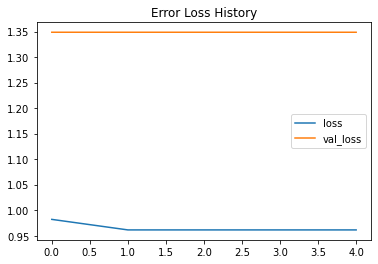

In [40]:
pd.DataFrame.from_dict(model1.history_).plot(title='Error Loss History')

Comment améliorer cela ?
Fonction d'activation ? nombre de contamination ? régularisation ? nombre de couches ? ...

In [36]:
# Classes affectées aux individus de par le modèle
y_label = model1.labels_
y_label

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
%%time
# Prédiction
predicted1 = model1.predict(X_test_scale)

23357/23357 [==============================] - 22s 952us/step
CPU times: total: 33.6 s
Wall time: 30 s


In [42]:
%%time
resultats(predicted1)

Confusion matrix:
 [[734960   5877]
 [  6166    407]]
F1_score :
 0.06331181457571751
Estimateurs :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    740837
           1       0.06      0.06      0.06      6573

    accuracy                           0.98    747410
   macro avg       0.53      0.53      0.53    747410
weighted avg       0.98      0.98      0.98    747410

Auc Score :
 0.527
Marge = 2003859.1 euros
CPU times: total: 4.02 s
Wall time: 3.84 s


Les performances ne sont ni meilleures ni plus mauvaises qu'avec les autres modèles.

In [43]:
%%time
model2 = AutoEncoder(epochs=5, 
                   contamination=0.01, 
                   hidden_neurons =[12,6,2,2,6,12],
                   hidden_activation = 'softmax',
                   batch_size = 128,
                   dropout_rate = 0.01,
                   random_state = 0,
                   l2_regularizer = 0.1,
                   loss = 'BinaryCrossentropy',
                   preprocessing = False)

autoencoder_train2=model2.fit(X_train_scale)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 12)                156       
                                                                 
 dropout_40 (Dropout)        (None, 12)                0         
                                                                 
 dense_46 (Dense)            (None, 12)                156       
                                                                 
 dropout_41 (Dropout)        (None, 12)                0         
                                                                 
 dense_47 (Dense)            (None, 12)                156       
                                                                 
 dropout_42 (Dropout)        (None, 12)                0         
                                                                 
 dense_48 (Dense)            (None, 6)                

<AxesSubplot:title={'center':'Error Loss History'}>

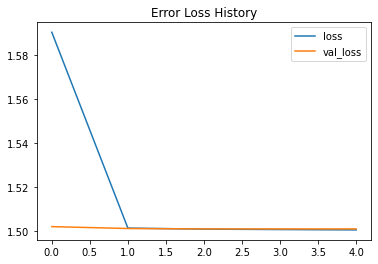

In [44]:
pd.DataFrame.from_dict(model2.history_).plot(title='Error Loss History')

In [45]:
%%time
# Prédiction
predicted2 = model2.predict(X_test_scale)

23357/23357 [==============================] - 30s 1ms/step
CPU times: total: 41 s
Wall time: 37.6 s


In [46]:
%%time
resultats(predicted2)

Confusion matrix:
 [[734960   5877]
 [  6166    407]]
F1_score :
 0.06331181457571751
Estimateurs :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    740837
           1       0.06      0.06      0.06      6573

    accuracy                           0.98    747410
   macro avg       0.53      0.53      0.53    747410
weighted avg       0.98      0.98      0.98    747410

Auc Score :
 0.527
Marge = 2003859.1 euros
CPU times: total: 4.59 s
Wall time: 4.33 s


In [17]:
%%time
model3 = AutoEncoder(epochs=5, 
                   contamination=0.01, 
                   hidden_neurons =[12,6,2,2,6,12],
                   hidden_activation = 'sigmoid',
                   batch_size = 128,
                   dropout_rate = 0.01,
                   random_state = 0,
                   l2_regularizer = 0.9,
                   loss = 'BinaryCrossentropy',
                   output_activation = 'relu',
                   preprocessing = False)

autoencoder_train3=model3.fit(X_train_scale)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                156       
                                                                 
 dropout (Dropout)           (None, 12)                0         
                                                                 
 dense_1 (Dense)             (None, 12)                156       
                                                                 
 dropout_1 (Dropout)         (None, 12)                0         
                                                                 
 dense_2 (Dense)             (None, 12)                156       
                                                                 
 dropout_2 (Dropout)         (None, 12)                0         
                                                                 
 dense_3 (Dense)             (None, 6)                 7

<AxesSubplot:title={'center':'Error Loss History'}>

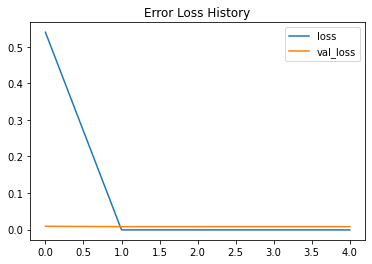

In [18]:
pd.DataFrame.from_dict(model3.history_).plot(title='Error Loss History')

In [19]:
%%time
# Prédiction
predicted3 = model3.predict(X_test_scale)
resultats(predicted3)

23357/23357 [==============================] - 27s 1ms/step
Confusion matrix:
 [[734961   5876]
 [  6166    407]]
F1_score :
 0.06331673926571252
Estimateurs :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    740837
           1       0.06      0.06      0.06      6573

    accuracy                           0.98    747410
   macro avg       0.53      0.53      0.53    747410
weighted avg       0.98      0.98      0.98    747410

Auc Score :
 0.527
Marge = 2003859.34 euros
CPU times: total: 48.2 s
Wall time: 45.4 s


In [21]:
%%time
model4 = AutoEncoder(epochs=5, 
                   contamination=0.01, 
                   hidden_neurons =[12,3,3,12],
                   hidden_activation = 'relu',
                   batch_size = 128,
                   dropout_rate = 0.01,
                   random_state = 0,
                   l2_regularizer = 0.1,
                   loss = 'BinaryCrossentropy',
                   preprocessing = False)

autoencoder_train4=model4.fit(X_train_scale)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 12)                156       
                                                                 
 dropout_8 (Dropout)         (None, 12)                0         
                                                                 
 dense_11 (Dense)            (None, 12)                156       
                                                                 
 dropout_9 (Dropout)         (None, 12)                0         
                                                                 
 dense_12 (Dense)            (None, 12)                156       
                                                                 
 dropout_10 (Dropout)        (None, 12)                0         
                                                                 
 dense_13 (Dense)            (None, 3)                

<AxesSubplot:title={'center':'Error Loss History'}>

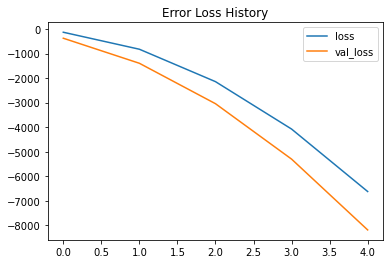

In [24]:
pd.DataFrame.from_dict(model4.history_).plot(title='Error Loss History')

In [25]:
%%time
# Prédiction
predicted4 = model4.predict(X_test_scale)
resultats(predicted4)

23357/23357 [==============================] - 23s 998us/step
Confusion matrix:
 [[734822   6015]
 [  6162    411]]
F1_score :
 0.06323563351027002
Estimateurs :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    740837
           1       0.06      0.06      0.06      6573

    accuracy                           0.98    747410
   macro avg       0.53      0.53      0.53    747410
weighted avg       0.98      0.98      0.98    747410

Auc Score :
 0.5272
Marge = 2007234.47 euros
CPU times: total: 36.8 s
Wall time: 34.4 s


In [26]:
%%time
model5 = AutoEncoder(epochs=5, 
                   contamination=0.01, 
                   hidden_neurons =[12,3,3,12],
                   batch_size = 128,
                   loss = 'BinaryCrossentropy')

autoencoder_train5=model5.fit(X_train_scale)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 12)                156       
                                                                 
 dropout_14 (Dropout)        (None, 12)                0         
                                                                 
 dense_18 (Dense)            (None, 12)                156       
                                                                 
 dropout_15 (Dropout)        (None, 12)                0         
                                                                 
 dense_19 (Dense)            (None, 12)                156       
                                                                 
 dropout_16 (Dropout)        (None, 12)                0         
                                                                 
 dense_20 (Dense)            (None, 3)                

<AxesSubplot:title={'center':'Error Loss History'}>

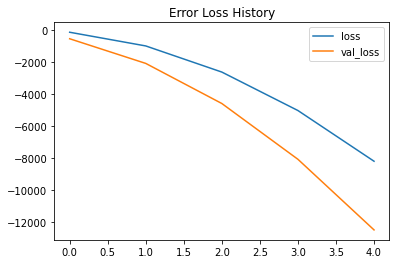

In [27]:
pd.DataFrame.from_dict(model5.history_).plot(title='Error Loss History')

In [28]:
%%time
# Prédiction
predicted5 = model5.predict(X_test_scale)
resultats(predicted5)

23357/23357 [==============================] - 23s 991us/step
Confusion matrix:
 [[734960   5877]
 [  6165    408]]
F1_score :
 0.06346243583761083
Estimateurs :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    740837
           1       0.06      0.06      0.06      6573

    accuracy                           0.98    747410
   macro avg       0.53      0.53      0.53    747410
weighted avg       0.98      0.98      0.98    747410

Auc Score :
 0.5271
Marge = 2003889.07 euros
CPU times: total: 37.3 s
Wall time: 34.6 s


In [29]:
%%time
model6 = AutoEncoder(epochs=5, 
                   contamination=0.01, 
                   hidden_neurons =[12,8,6,2,2,6,8,12],
                   batch_size = 128,
                   loss = 'BinaryCrossentropy')

autoencoder_train6=model6.fit(X_train_scale)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 12)                156       
                                                                 
 dropout_20 (Dropout)        (None, 12)                0         
                                                                 
 dense_25 (Dense)            (None, 12)                156       
                                                                 
 dropout_21 (Dropout)        (None, 12)                0         
                                                                 
 dense_26 (Dense)            (None, 12)                156       
                                                                 
 dropout_22 (Dropout)        (None, 12)                0         
                                                                 
 dense_27 (Dense)            (None, 8)                

<AxesSubplot:title={'center':'Error Loss History'}>

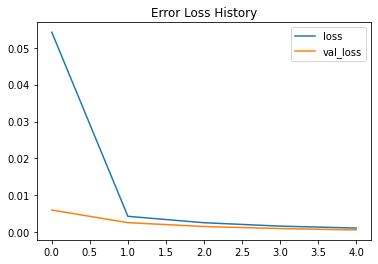

In [30]:
pd.DataFrame.from_dict(model6.history_).plot(title='Error Loss History')

In [31]:
%%time
# Prédiction
predicted6 = model6.predict(X_test_scale)
resultats(predicted6)

23357/23357 [==============================] - 24s 1ms/step
Confusion matrix:
 [[734960   5877]
 [  6165    408]]
F1_score :
 0.06346243583761083
Estimateurs :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    740837
           1       0.06      0.06      0.06      6573

    accuracy                           0.98    747410
   macro avg       0.53      0.53      0.53    747410
weighted avg       0.98      0.98      0.98    747410

Auc Score :
 0.5271
Marge = 2003889.07 euros
CPU times: total: 38 s
Wall time: 35.8 s
